Comenzamos con la importación de las librerías necesarias:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
sns.set_theme()

# Conjunto de datos

## Carga de datos desde archivo
Los datos se presentan como un único archivo csv separado por comas:

In [ ]:
df = pd.read_excel('dataset.xlsx')
df.head()

,I,V,State,T1,T2,SOC
0,0.0,3.589837,2,40.11519,38.83156,100.0
1,0.0,3.503166,2,40.13894,38.83156,100.0
2,0.0,3.476616,2,40.11519,38.81969,100.0
3,0.0,3.459525,2,40.13894,38.87901,100.0
4,0.0,3.447318,2,40.15081,38.90273,100.0


## Información general del conjunto de datos
El conjunto de datos objeto de estudio contiene un total de 16369 observaciones. Al tratarse de un conjunto de muestras tomadas con un tiempo de muestreo de 1 segundo, el tiempo total abarcado por el experimento ha sido de 4 horas, 32 minutos y 48 segundos.

La variable State es categórica y se ha recodificado a números enteros, el resto se trata de variables numéricas continuas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369 entries, 0 to 16368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       16369 non-null  float64
 1   V       16369 non-null  float64
 2   State   16369 non-null  int64  
 3   T1      16369 non-null  float64
 4   T2      16369 non-null  float64
 5   SOC     16369 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 767.4 KB


## Medidas de tendencia central y variabilidad

In [ ]:
df.describe()

,I,V,State,T1,T2,SOC
count,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000
mean,-1.626177,3.225005,2.198668,39.501219,38.197723,49.627360
std,29.622911,0.234249,1.056329,1.003020,0.966942,32.670179
min,-32.043290,1.999847,1.000000,37.431740,36.150660,0.000000
25%,-31.997208,3.115587,1.000000,38.749720,37.479240,20.506231
50%,0.000000,3.211719,3.000000,39.438390,38.107950,49.576647
75%,31.999512,3.418631,3.000000,40.186440,38.855280,78.623442
max,32.050202,3.649958,4.000000,41.801250,40.563470,100.000000


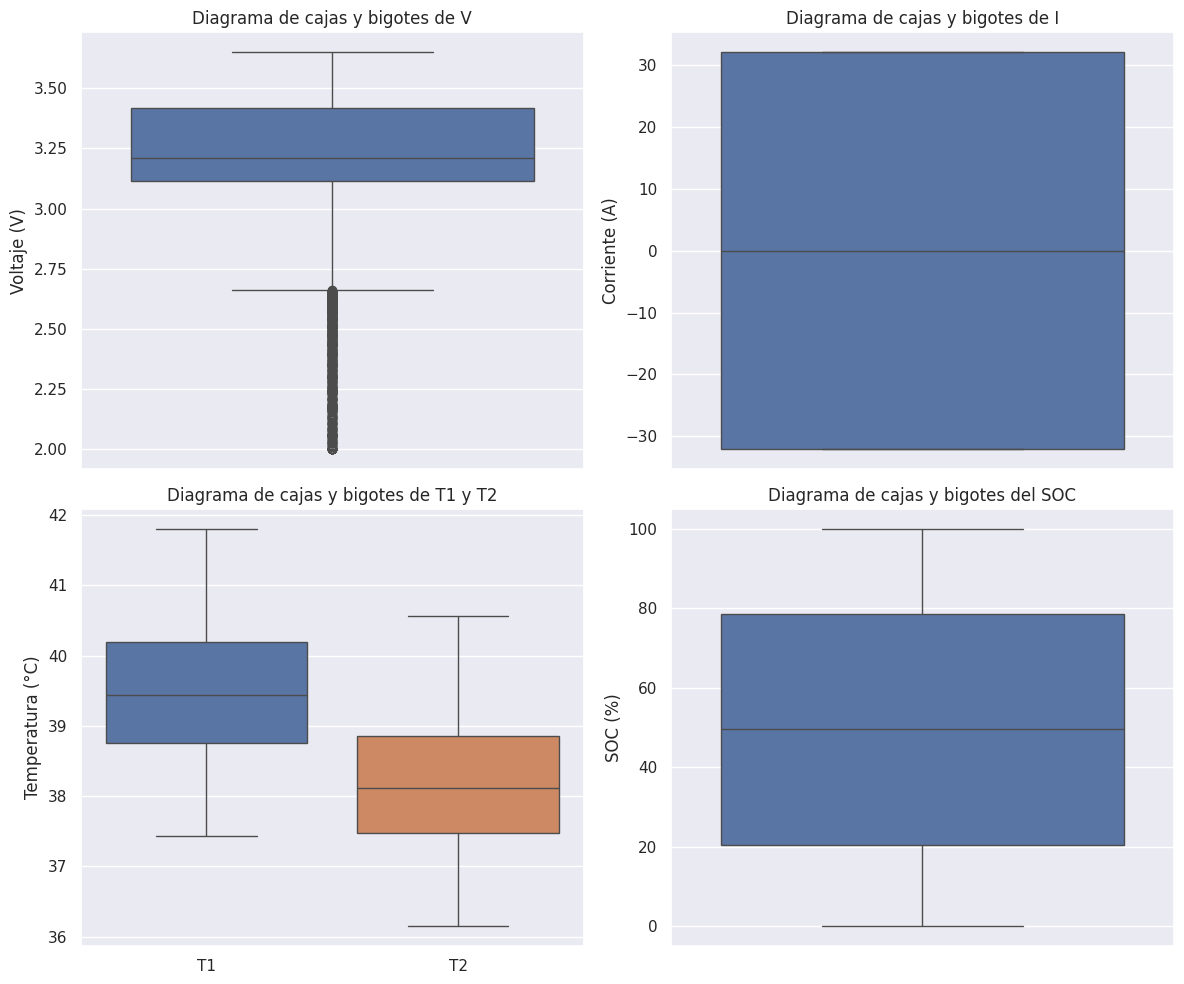

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], y=df['V'])
axes[0, 0].set_ylabel("Voltaje (V)")
axes[0, 0].set_title('Diagrama de cajas y bigotes de V')

sns.boxplot(ax=axes[0, 1], y=df['I'])
axes[0, 1].set_ylabel("Corriente (A)")
axes[0, 1].set_title('Diagrama de cajas y bigotes de I')

sns.boxplot(ax=axes[1, 0], data=df[['T1', 'T2']])
axes[1, 0].set_ylabel("Temperatura (°C)")
axes[1, 0].set_title('Diagrama de cajas y bigotes de T1 y T2')

sns.boxplot(ax=axes[1, 1], y=df['SOC'])
axes[1, 1].set_ylabel("SOC (%)")
axes[1, 1].set_title('Diagrama de cajas y bigotes del SOC')

plt.tight_layout()
plt.show()

# Visualización de los datos

##Análisis de una variable

### Corriente
La corriente está claramente separada en tres subconjuntos o poblaciones, que se corresponden respectivamente con los estados de descarga, reposo y carga.

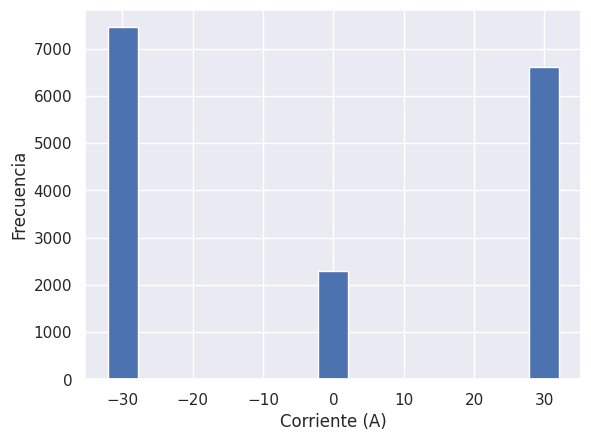

In [ ]:
plt.hist(df["I"], bins="auto")
plt.xlabel("Corriente (A)")
plt.ylabel("Frecuencia")
plt.show()

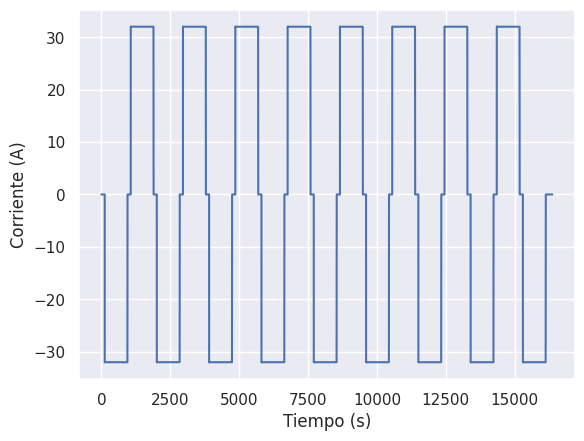

In [ ]:
plt.plot(df["I"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.show()

###Tensión
La tensión o voltaje, por su distribución, parece contener cuatro subpoblaciones que podrían corresponderse con la carga, reposo tras carga, descarga y reposo tras descarga.

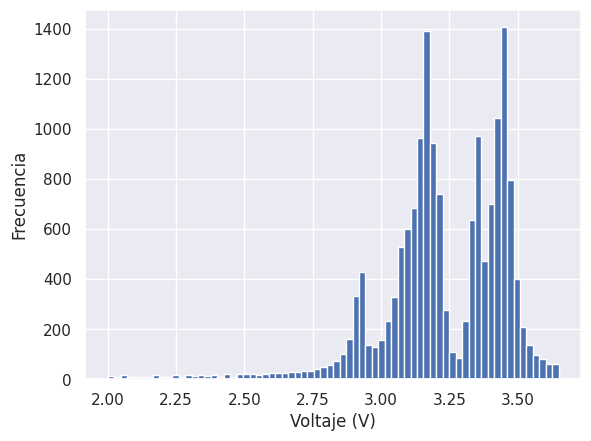

In [ ]:
counts, bin_edges, patches = plt.hist(df["V"], bins="auto")
plt.xlabel("Voltaje (V)")
plt.ylabel("Frecuencia")
plt.show()

Esta suposición queda validada al descomponer el conjunto original y mostrar todas las partes juntas en una gráfica.

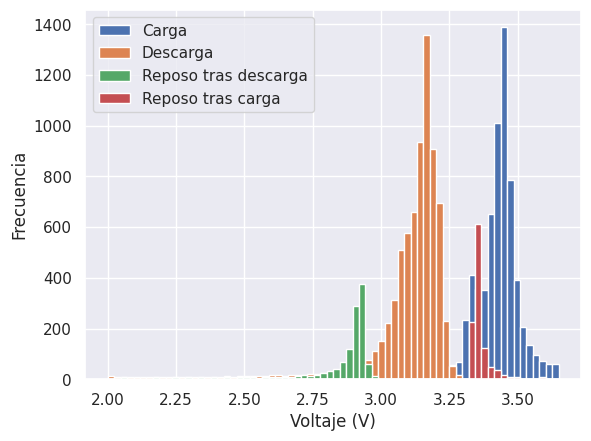

In [ ]:
carga = df[df["State"] == 1]
reposo_tras_carga = df[df["State"] == 2]
descarga = df[df["State"] == 3]
reposo_tras_descarga = df[df["State"] == 4]

plt.hist(carga["V"], bins=bin_edges)
plt.hist(descarga["V"], bins=bin_edges)
plt.hist(reposo_tras_descarga["V"], bins=bin_edges)
plt.hist(reposo_tras_carga["V"], bins=bin_edges)
plt.xlabel("Voltaje (V)")
plt.ylabel("Frecuencia")
plt.legend(["Carga", "Descarga", "Reposo tras descarga", "Reposo tras carga"])
plt.show()

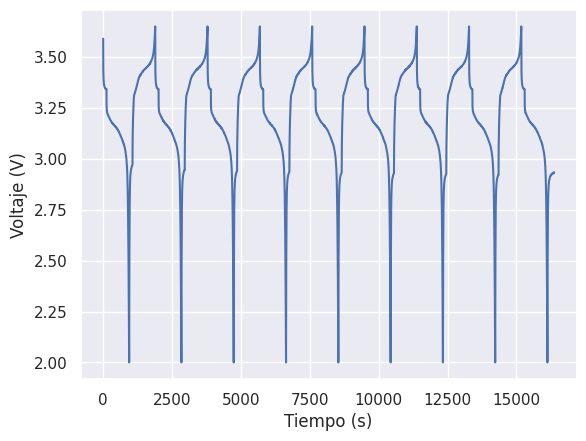

In [ ]:
plt.plot(df["V"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.show()

###Temperatura

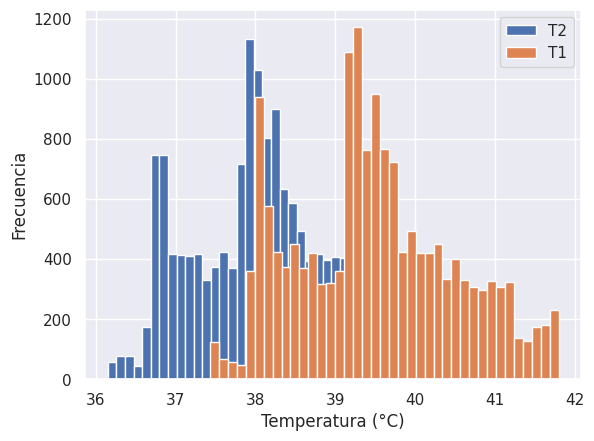

In [ ]:
plt.hist(df["T2"], bins="auto")
plt.hist(df["T1"], bins="auto")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.legend(["T2", "T1"])
plt.show()

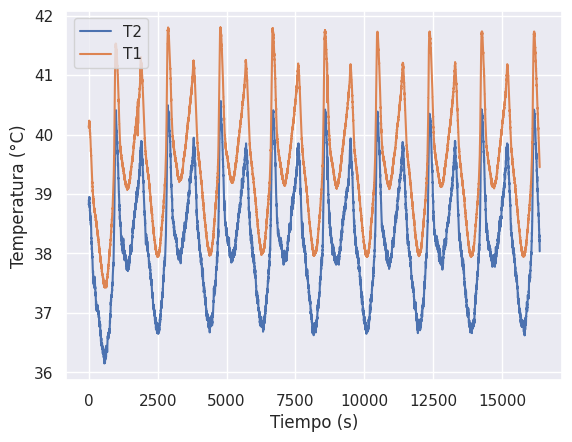

In [ ]:
plt.plot(df["T2"], label="T2")
plt.plot(df["T1"], label="T1")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()

###Estado

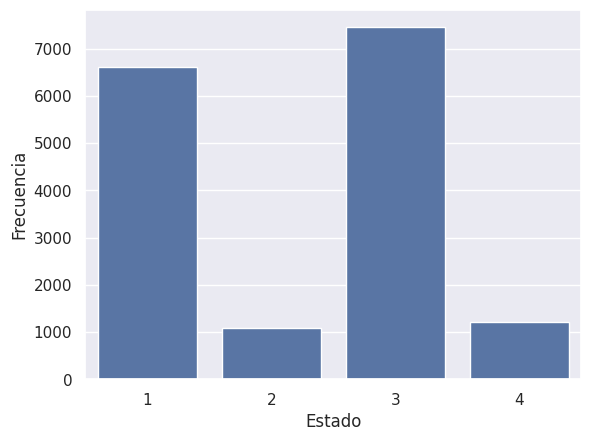

In [ ]:
ax = sns.countplot(x=df['State'])
ax.set(xlabel="Estado", ylabel="Frecuencia")
plt.show()

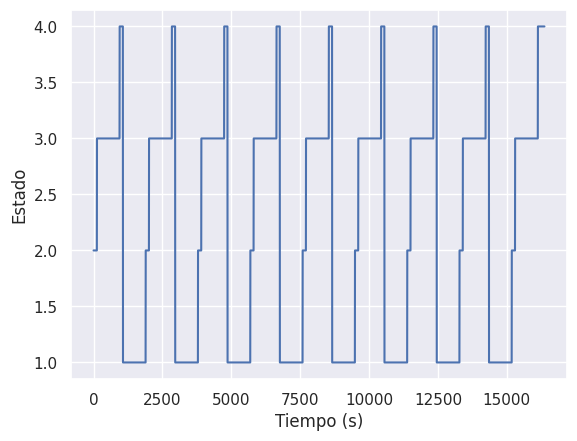

In [ ]:
plt.plot(df["State"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Estado")
plt.show()

###Estado de carga

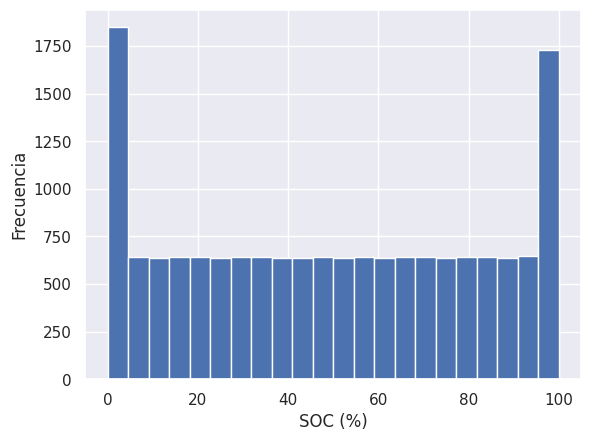

In [ ]:
plt.hist(df["SOC"], bins="auto")
plt.xlabel("SOC (%)")
plt.ylabel("Frecuencia")
plt.show()

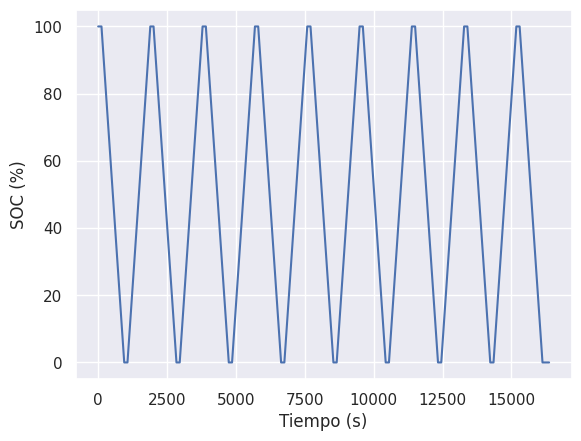

In [ ]:
plt.plot(df["SOC"])
plt.xlabel("Tiempo (s)")
plt.ylabel("SOC (%)")
plt.show()

##Matriz de correlación
Después de analizar pormenorizadamente cada variable por separado, procedemos a analizar la correlación entre variables.

<Axes: >

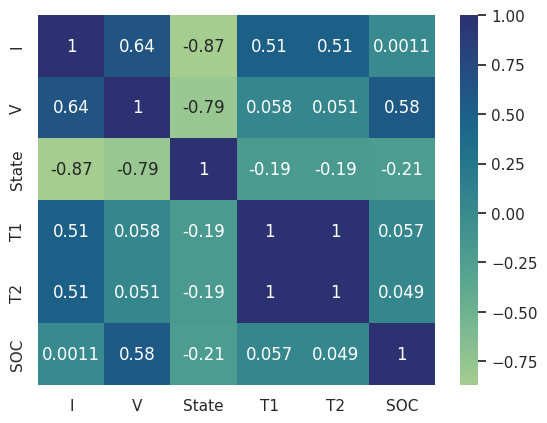

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

##Análisis bivariado
De los datos podemos sacar que la única variable con una relación suficiente con el estado de carga es la tensión.

Otras relaciones interesantes son la relación entre la temperaturas T1 y T2, el voltaje con la intensidad o la intensidad con la temperatura.

###Estado de carga frente a tensión

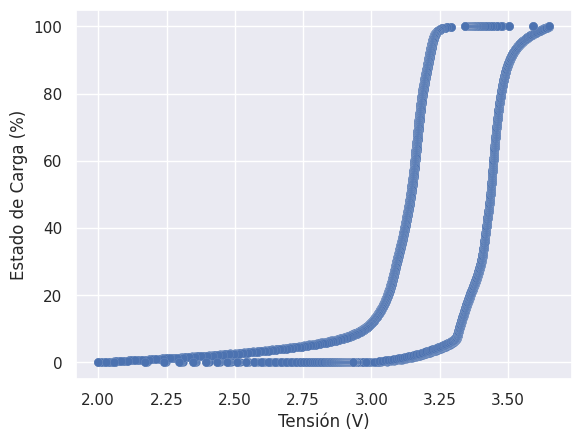

In [ ]:
sns.scatterplot(x=df["V"], y=df["SOC"], linewidth=0.05)
plt.xlabel("Tensión (V)")
plt.ylabel("Estado de Carga (%)")
#plt.title("Estado de carga en función de la tensión")
#plt.xlim(105, -5)
plt.show()

###Estado de carga frente a corriente

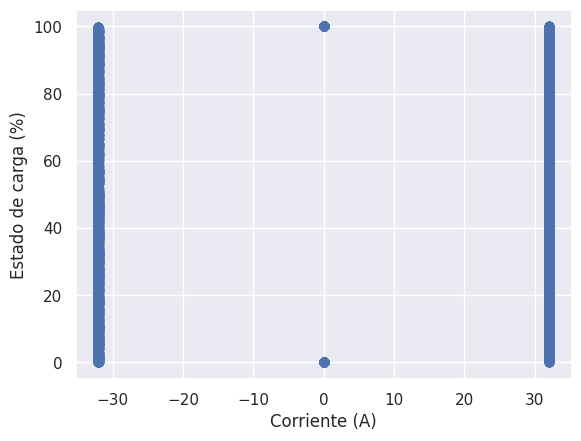

In [ ]:
plt.scatter(df["I"], df["SOC"])
plt.xlabel("Corriente (A)")
plt.ylabel("Estado de carga (%)")
#plt.title("Estado de carga en función de la corriente")
plt.show()

###Estado de carga frente a temperatura

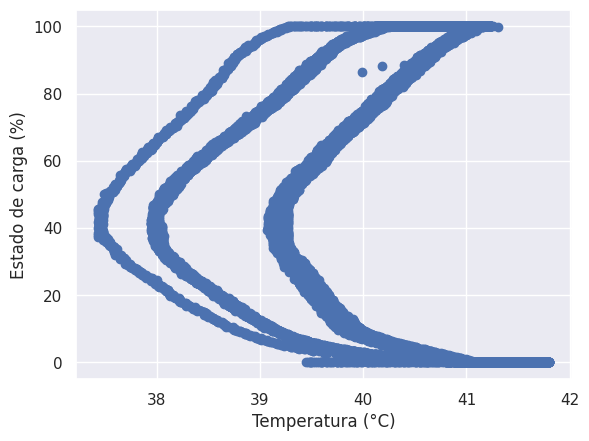

In [ ]:
plt.scatter(df["T1"], df["SOC"])
plt.xlabel("Temperatura (°C)")
plt.ylabel("Estado de carga (%)")
#plt.title("Estado de carga en función de la temperatura")
plt.show()

###Temperatura 2 frente a temperatura 1

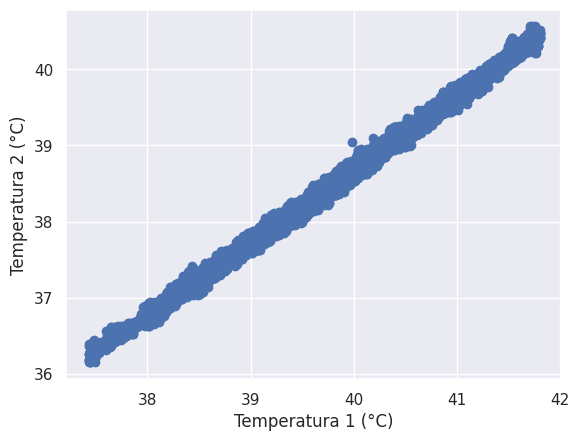

In [ ]:
plt.scatter(df["T1"], df["T2"])
plt.xlabel("Temperatura 1 (°C)")
plt.ylabel("Temperatura 2 (°C)")
#plt.title("Temperatura 2 en función de la temperatura 1")
plt.show()

###Temperatura frente a corriente

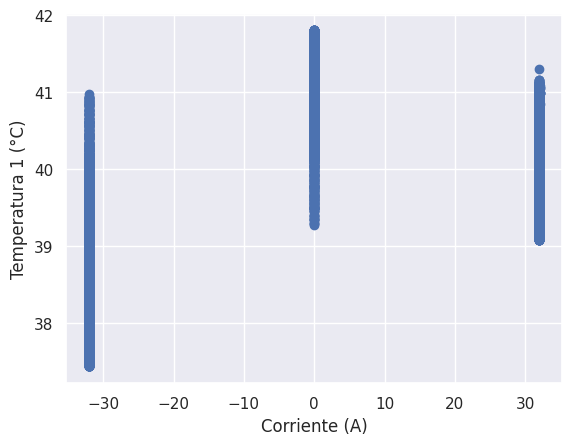

In [ ]:
plt.scatter(df["I"], df["T1"])
plt.xlabel("Corriente (A)")
plt.ylabel("Temperatura 1 (°C)")
#plt.title("Temperatura en función de la corriente")
plt.show()

###Tensión frente a corriente

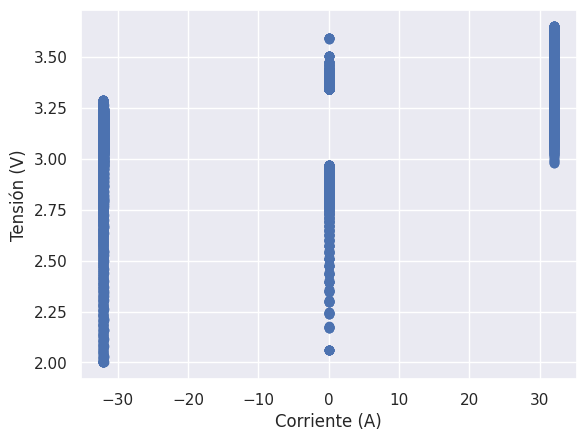

In [ ]:
plt.scatter(df["I"], df["V"])
plt.xlabel("Corriente (A)")
plt.ylabel("Tensión (V)")
#plt.title("Tensión en función de la corriente")
plt.show()